In [22]:
import numpy as np
from scipy.signal import filtfilt, welch
import matplotlib.pyplot as plt

In [23]:
import sympy as sym
sym.init_printing()

In [24]:
wn = sym.symbols('w_n')
xi = sym.symbols('xi')
T, z = sym.symbols('T, z')

In [41]:
num1 = (T**2)*sym.exp(-wn*T)*T*wn**2
num1

In [42]:
den2 = 1
den1 = -2*sym.exp(-wn*T)
den0 = sym.exp(-2*wn*T)
den1

In [43]:
wnn = 350
xin = 1.0
Ts = 1.0/148.15
n = np.array([float(num1.subs(wn,wnn).subs(xi,xin).subs(T,Ts)),0])
d = np.array([1.0,float(den1.subs(wn,wnn).subs(xi,xin).subs(T,Ts)), float(den0.subs(wn,wnn).subs(xi,xin).subs(T,Ts))])
print n
print d
np.roots(d)

[ 0.00354832  0.        ]
[ 1.         -0.1883745   0.00887124]


array([ 0.09418725 +1.16611079e-09j,  0.09418725 -1.16611079e-09j])

In [44]:
t = np.arange(0.0, 40, Ts)

In [61]:
x = np.random.randn(np.size(t))
x1 = filtfilt(n,d,x)
x1

array([  1.15550367e-05,   1.25926173e-05,   1.39092622e-05, ...,
         6.62274321e-06,   7.01108067e-06,  -2.32448638e-05])

<IPython.core.display.Javascript object>


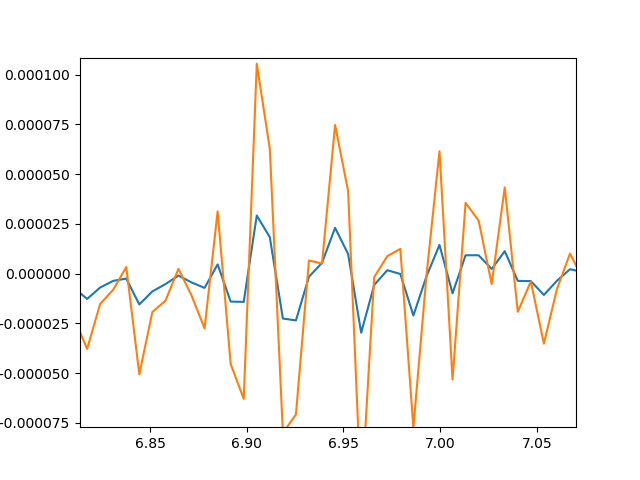

In [63]:
%matplotlib notebook
plt.plot(t,x1, t,(Ts**2)*x)
plt.show()

In [56]:
f, S =  welch(x1,fs = 1.0/Ts)

<IPython.core.display.Javascript object>


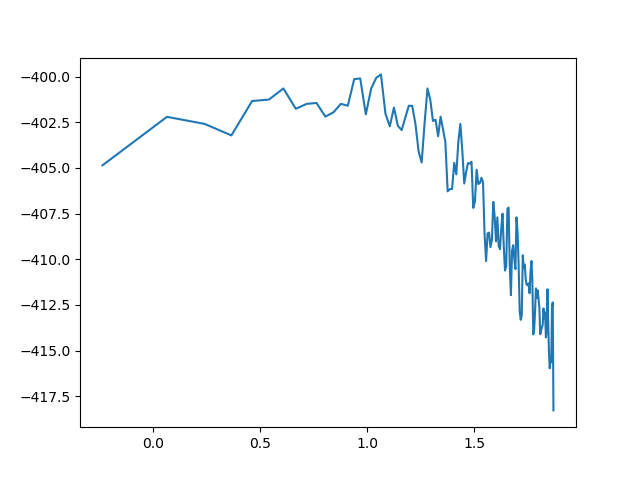

/opt/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [57]:
plt.figure()
plt.plot(np.log10(f), 20*np.log10(S))
plt.show()

<IPython.core.display.Javascript object>


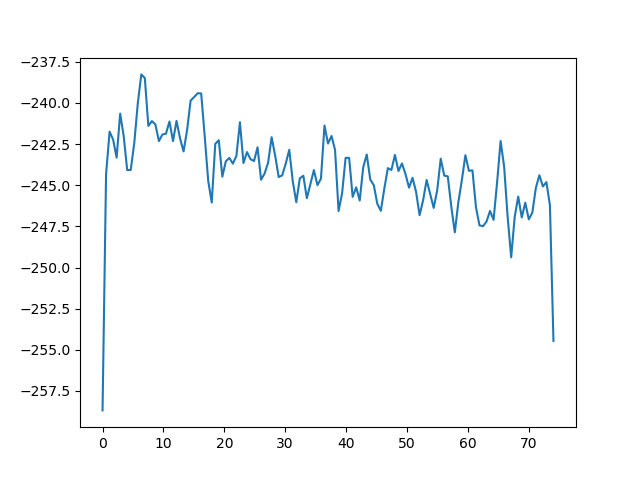

In [21]:
plt.figure()
plt.plot(f, 20*np.log10(S))
plt.show()